Combine 2 models, CNN with VGGNET

Found 1304 images belonging to 3 classes.
Found 478 images belonging to 3 classes.
Epoch 1/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.8162 - loss: 0.5655 - val_accuracy: 0.8996 - val_loss: 0.3280
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.8865 - loss: 0.3442 - val_accuracy: 0.8996 - val_loss: 0.3050
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.8956 - loss: 0.2996 - val_accuracy: 0.9121 - val_loss: 0.2573
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.9065 - loss: 0.2505 - val_accuracy: 0.9142 - val_loss: 0.2598
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.9272 - loss: 0.2169 - val_accuracy: 0.9163 - val_loss: 0.2525
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.9255 - loss: 0.2274 - val_accuracy: 0.9289 - val_loss: 0.2272
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.9293 - loss: 0.2089 - val_accuracy: 0.9372 - val_loss: 0.2151
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━

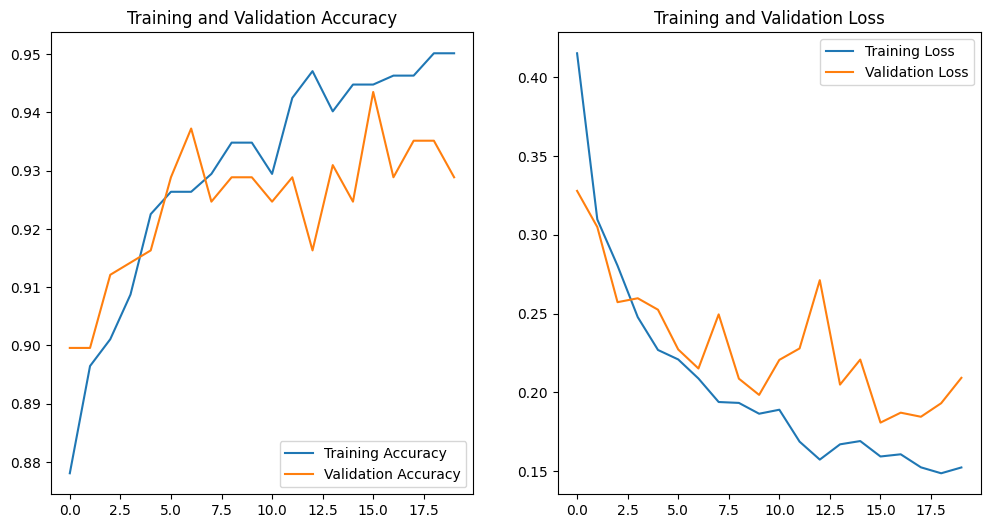

In [11]:
import os
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, concatenate
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Specify the directory containing the images
data_dir = r'C:\Users\Nino\Documents\pythonML\face_recognition-main\face_recognition-main\convertedd'  # Single directory for both training and validation

# Define the image size and batch size
image_size = (150, 150)  # Adjust as needed for custom CNN
batch_size = 32  # Adjust as needed

# Create ImageDataGenerator with augmentation for training
datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=258/958  # 258 images for validation, 700 for training
)

# Data generator for training set with augmentation
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',  # Training data
    shuffle=True
)

# Data generator for validation set (without augmentation)
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',  # Validation data
    shuffle=True
)

# Define the CNN model using the Functional API
input_shape = (150, 150, 3)
cnn_input = Input(shape=input_shape)

# Custom CNN architecture
cnn_output = Conv2D(32, (3, 3), activation='relu')(cnn_input)
cnn_output = MaxPooling2D(pool_size=(2, 2))(cnn_output)
cnn_output = Conv2D(64, (3, 3), activation='relu')(cnn_output)
cnn_output = MaxPooling2D(pool_size=(2, 2))(cnn_output)
cnn_output = Flatten()(cnn_output)
cnn_output = Dense(128, activation='relu')(cnn_output)

# Define the VGG16 model, without the top layers
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
vgg_model.trainable = False  # Freeze the VGG16 layers
vgg_output = vgg_model(cnn_input)
vgg_output = GlobalAveragePooling2D()(vgg_output)

# Concatenate the outputs of both models
merged = concatenate([cnn_output, vgg_output])

# Add final dense layers for classification
merged_output = Dense(512, activation='relu')(merged)
merged_output = Dropout(0.5)(merged_output)
merged_output = Dense(train_generator.num_classes, activation='softmax')(merged_output)

# Create the final model
combined_model = Model(inputs=cnn_input, outputs=merged_output)

# Compile the model
combined_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Set the number of epochs
epochs = 20

# Train the model and store the history
history = combined_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs
)

# Function to plot the training history
import matplotlib.pyplot as plt

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 6))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()

# Save the model if needed
combined_model.save('cnn_vgg_combined_model.keras')

# Plot the history
plot_history(history)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


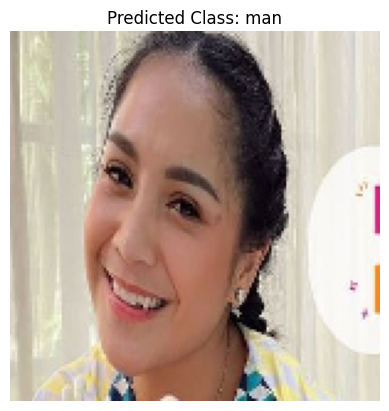

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


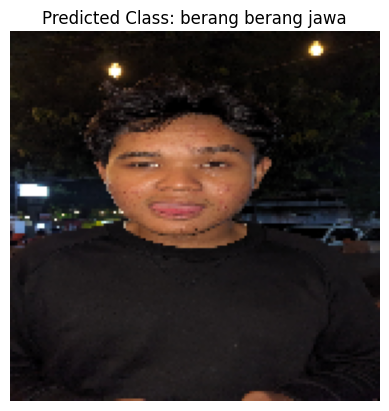

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


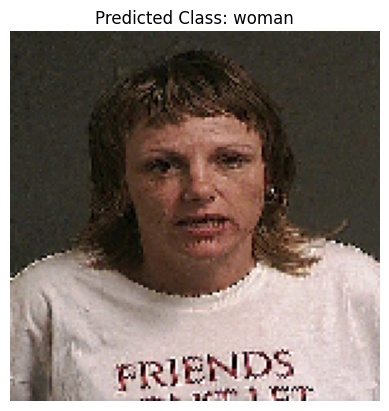

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


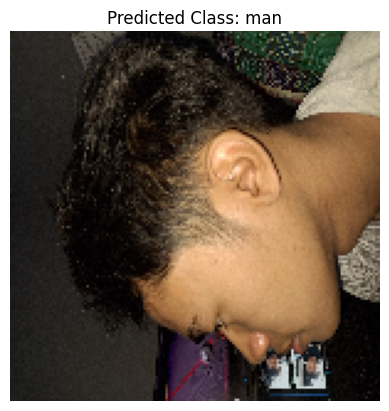

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


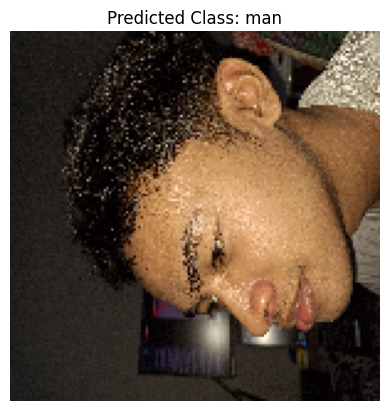

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


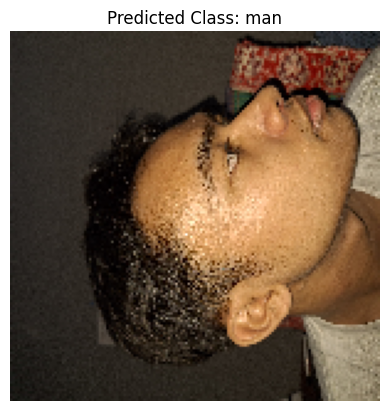

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


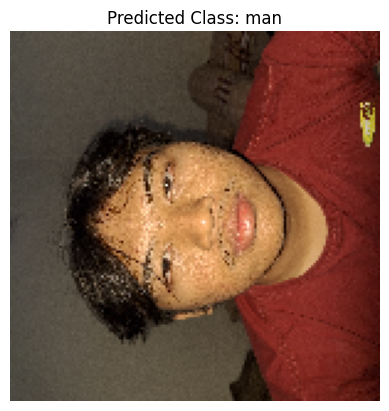

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


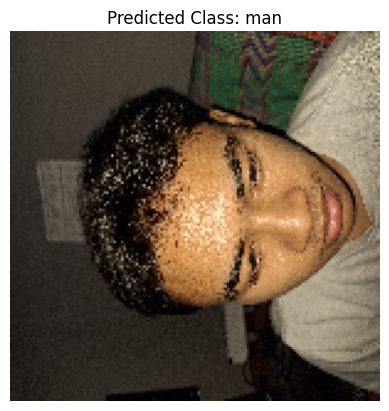

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


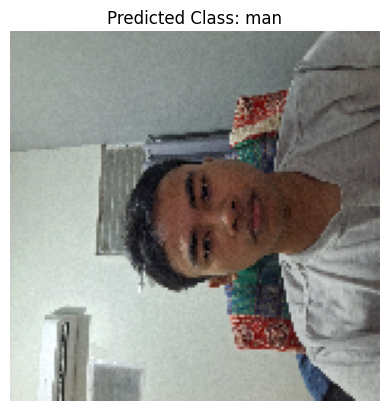

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


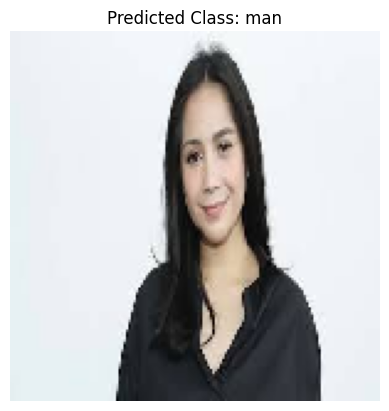

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


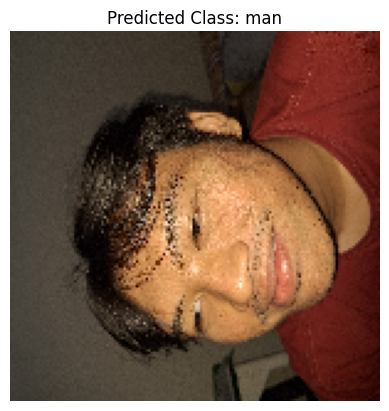

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


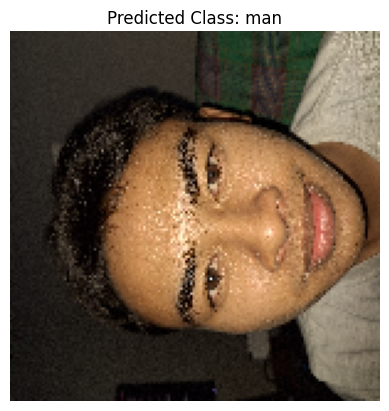

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


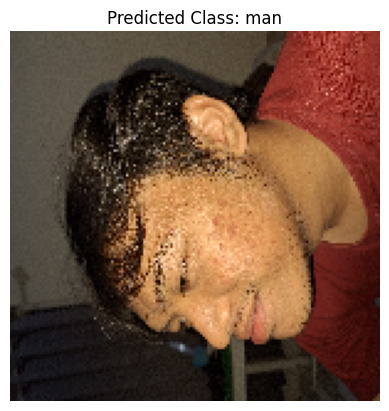

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


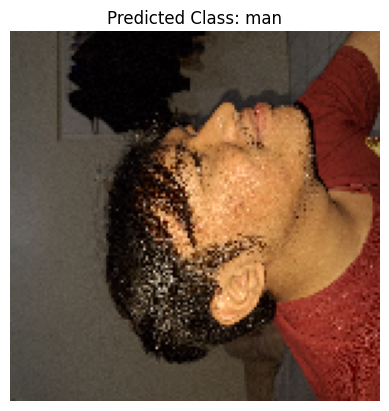

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


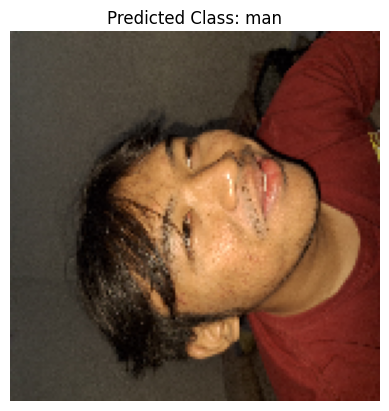

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


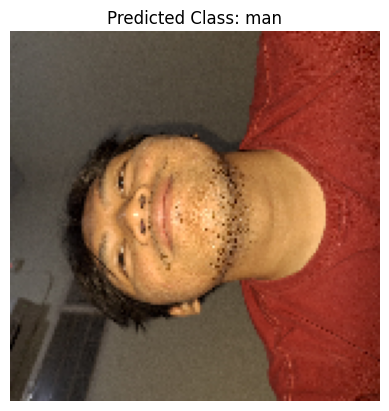

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


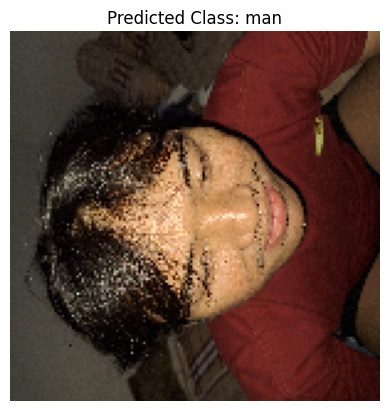

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


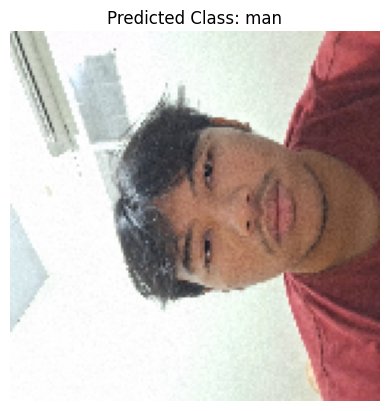

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


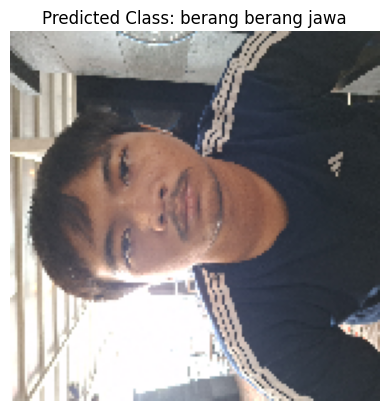

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


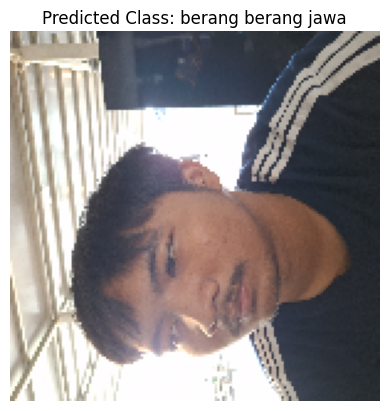

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


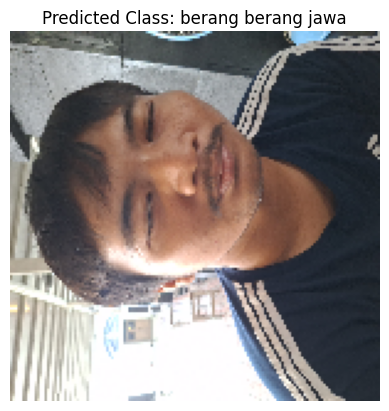

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


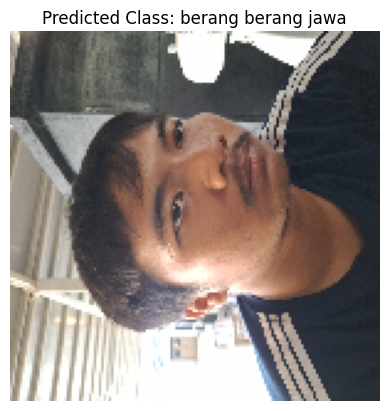

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


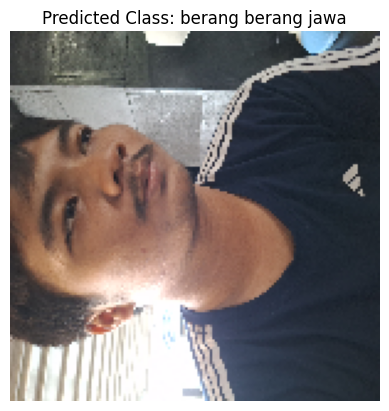

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


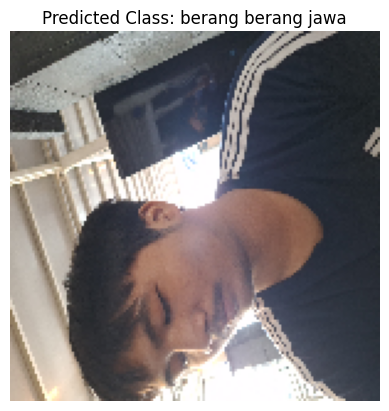

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


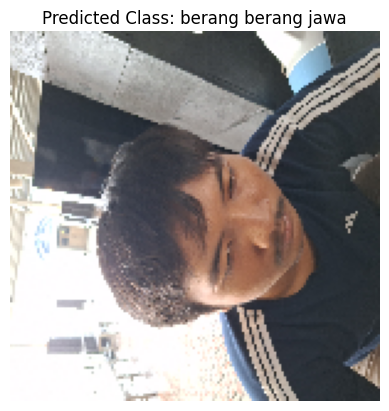

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


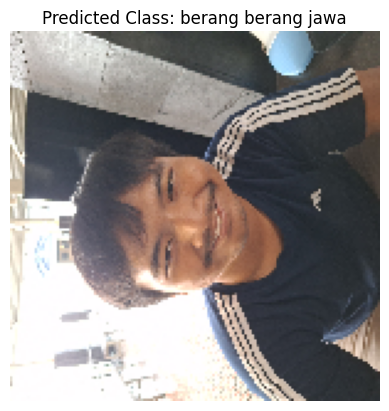

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


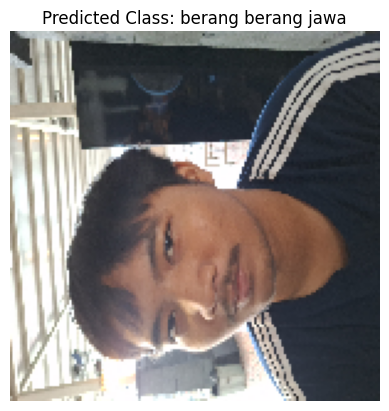

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


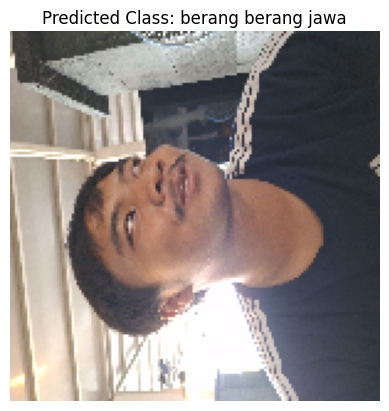

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


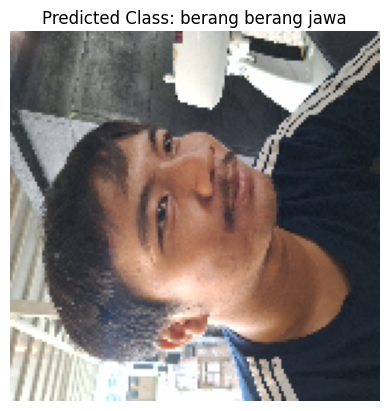

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


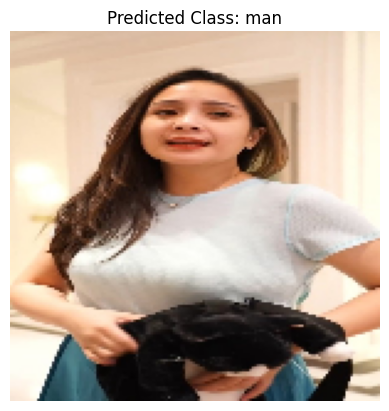

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


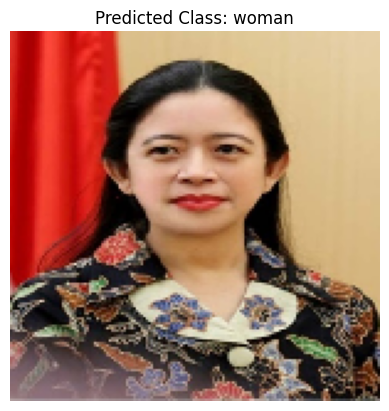

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


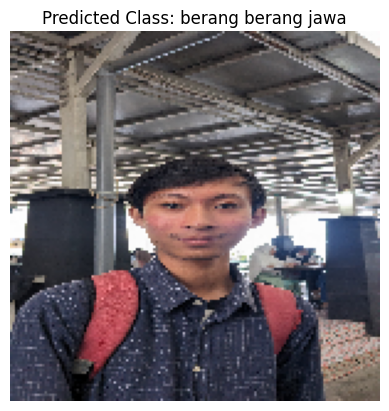

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


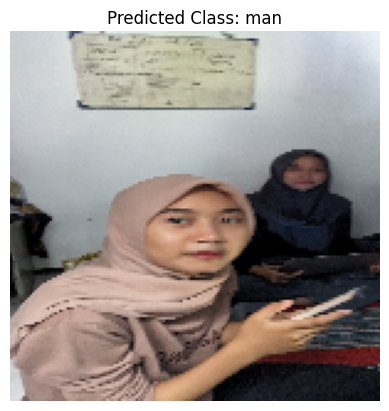

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


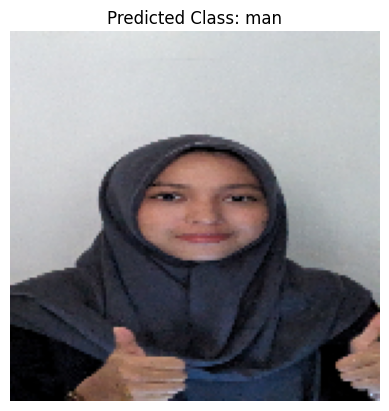

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


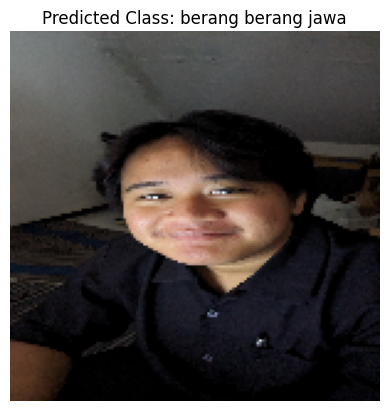

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


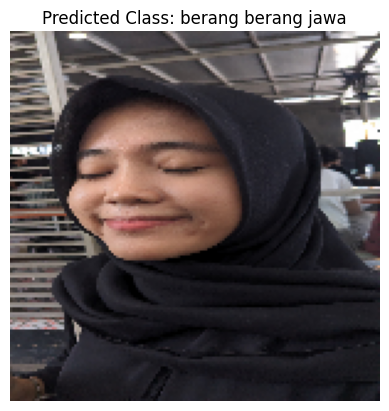

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


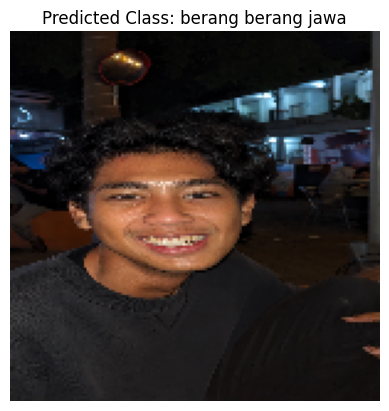

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


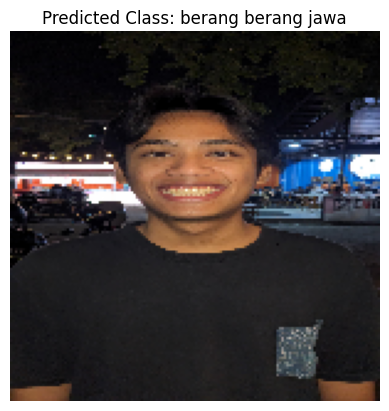

In [18]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import glob

# Load the model
model = load_model('cnn_vgg_combined_model.keras')

# Define class labels
class_labels = {
    0: 'woman',
    2: 'man',
    1: 'berang berang jawa'
}

# Function to predict and display an image
def predict_and_display_image(img_path):
    # Load the image
    img = image.load_img(img_path, target_size=(150, 150))  # Adjust size if needed
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Rescale as done during training

    # Make prediction
    preds = model.predict(img_array)
    predicted_class = np.argmax(preds, axis=1)[0]

    # Map the predicted class to the label
    predicted_label = class_labels[predicted_class]

    # Display the image with prediction
    plt.imshow(img)
    plt.title(f'Predicted Class: {predicted_label}')  # Show the class label
    plt.axis('off')  # Turn off axis
    plt.show()

# Path to the images
test_image_path_pattern = r'C:\Users\Nino\Documents\pythonML\face_recognition-main\face_recognition-main\sample_data\*.jpg'

# Retrieve all image paths that match the pattern
test_image_paths = glob.glob(test_image_path_pattern)

# Loop through each image and display the prediction
for test_image_path in test_image_paths:
    predict_and_display_image(test_image_path)
